#### Comparing the gene signatures across three fetal stem cells populations and LGR5+/- cells 
- **Developed by:** Anna Maguza
- **Affilation:** Faculty of Medicine, Würzburg University
- **Date of creation:** 10th September 2024
- **Last modified date:** 10th September 2024

This notebook is created to score the most highly expressed genes from Grün, 2016 LGR5+ mouse cells to fetal stem cells. In this part the common set of genes was obtained using `ensembl`orthologues. 


+ Import packages

In [9]:
import scanpy as sc
import pandas as pd
import numpy as np

+ Load fetal cells

In [10]:
fetal_adata = sc.read_h5ad("data/Fetal_cells_filtered_raw.h5ad")

+ Normalize fetal cells

In [11]:
fetal_adata_log = fetal_adata.copy()
sc.pp.normalize_total(fetal_adata_log, target_sum = 1e6, exclude_highly_expressed = True) #1e6 because it is 10X
sc.pp.log1p(fetal_adata_log)

In [12]:
fetal_adata_log = fetal_adata_log[fetal_adata_log.obs['Cell States'].isin(['MTRNR2L12+ASS1+_SC', 'TA', 'RPS10+_RPS17+_SC',
                                                                           'FXYD3+_CKB+_SC'])]

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [13]:
fetal_adata_log_copy = fetal_adata_log.copy()

+ Import orthologues

In [21]:
orthologues_ensembl = pd.read_csv("database_data/ensembl_data/mouse_to_human_orthologues_ensembl.txt", sep = "\t")

#### Score for Grün, 2016 signatures 

In [14]:
grun_2016 = sc.read_h5ad("data/Grun_2016/Grün_2016_all_cells.h5ad")

In [15]:
grun_2016.obs['gsm_description'].value_counts() 

gsm_description
Extracted RNA 3-week CD24+ control cells, non-traced                   96
Extracted RNA 3-week traced Lgr5+ cells, CD24+ fraction                96
Extracted RNA 5-day traced Lgr5+ cells replicate 1                     96
Extracted RNA 5-day traced Lgr5+ cells replicate 2                     96
Extracted RNA 5-day traced Lgr5+ cells replicate 3                     96
Extracted RNA 5-day traced Lgr5+ cells replicate 4                     96
Extracted RNA 5-day traced Lgr5+ cells replicate 5                     96
Extracted RNA 8-week CD24+ control cells, non-traced replicate 1       96
Extracted RNA 8-week CD24+ control cells, non-traced replicate 2       96
Extracted RNA 8-week traced Lgr5+ cells                                96
Extracted RNA 8-week traced Lgr5+ cells, CD24+ fraction replicate 1    96
Extracted RNA 8-week traced Lgr5+ cells, CD24+ fraction replicate 2    96
Extracted RNA 8-week traced Lgr5+ cells, CD24+ fraction replicate 3    96
Name: count, dtype: in

In [16]:
grun_2016 = grun_2016[grun_2016.obs['gsm_description'].str.contains("Lgr5+")]

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [17]:
grun_2016.var['gene_name'] = grun_2016.var_names.str.split("__").str[0]
grun_2016.var['chromosome'] = grun_2016.var_names.str.split("__").str[1]

grun_2016.var.index = grun_2016.var['gene_name']
grun_2016.var.index.name = 'gene_id'

/tmp/ipykernel_1482028/2476610837.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  grun_2016.var['gene_name'] = grun_2016.var_names.str.split("__").str[0]


In [18]:
mean_counts = grun_2016.X.mean(axis=0)
grun_2016.var['mean_counts'] = mean_counts

grun_genes = grun_2016.var.sort_values('mean_counts', ascending=False)

In [19]:
grun_genes = pd.DataFrame(grun_genes)

In [22]:
grun_genes = pd.merge(grun_genes['gene_name'], orthologues_ensembl, left_on='gene_name', right_on='Gene name', how='left')

In [23]:
grun_genes = grun_genes['Human gene name'].dropna().unique()

In [24]:
signature_genes = grun_genes[:100]

+ Score genes

In [25]:
sc.tl.score_genes(fetal_adata_log, gene_list=signature_genes, score_name='LGR5+_score')

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/amaguza/miniforge3/envs/scanpy_env/lib/python

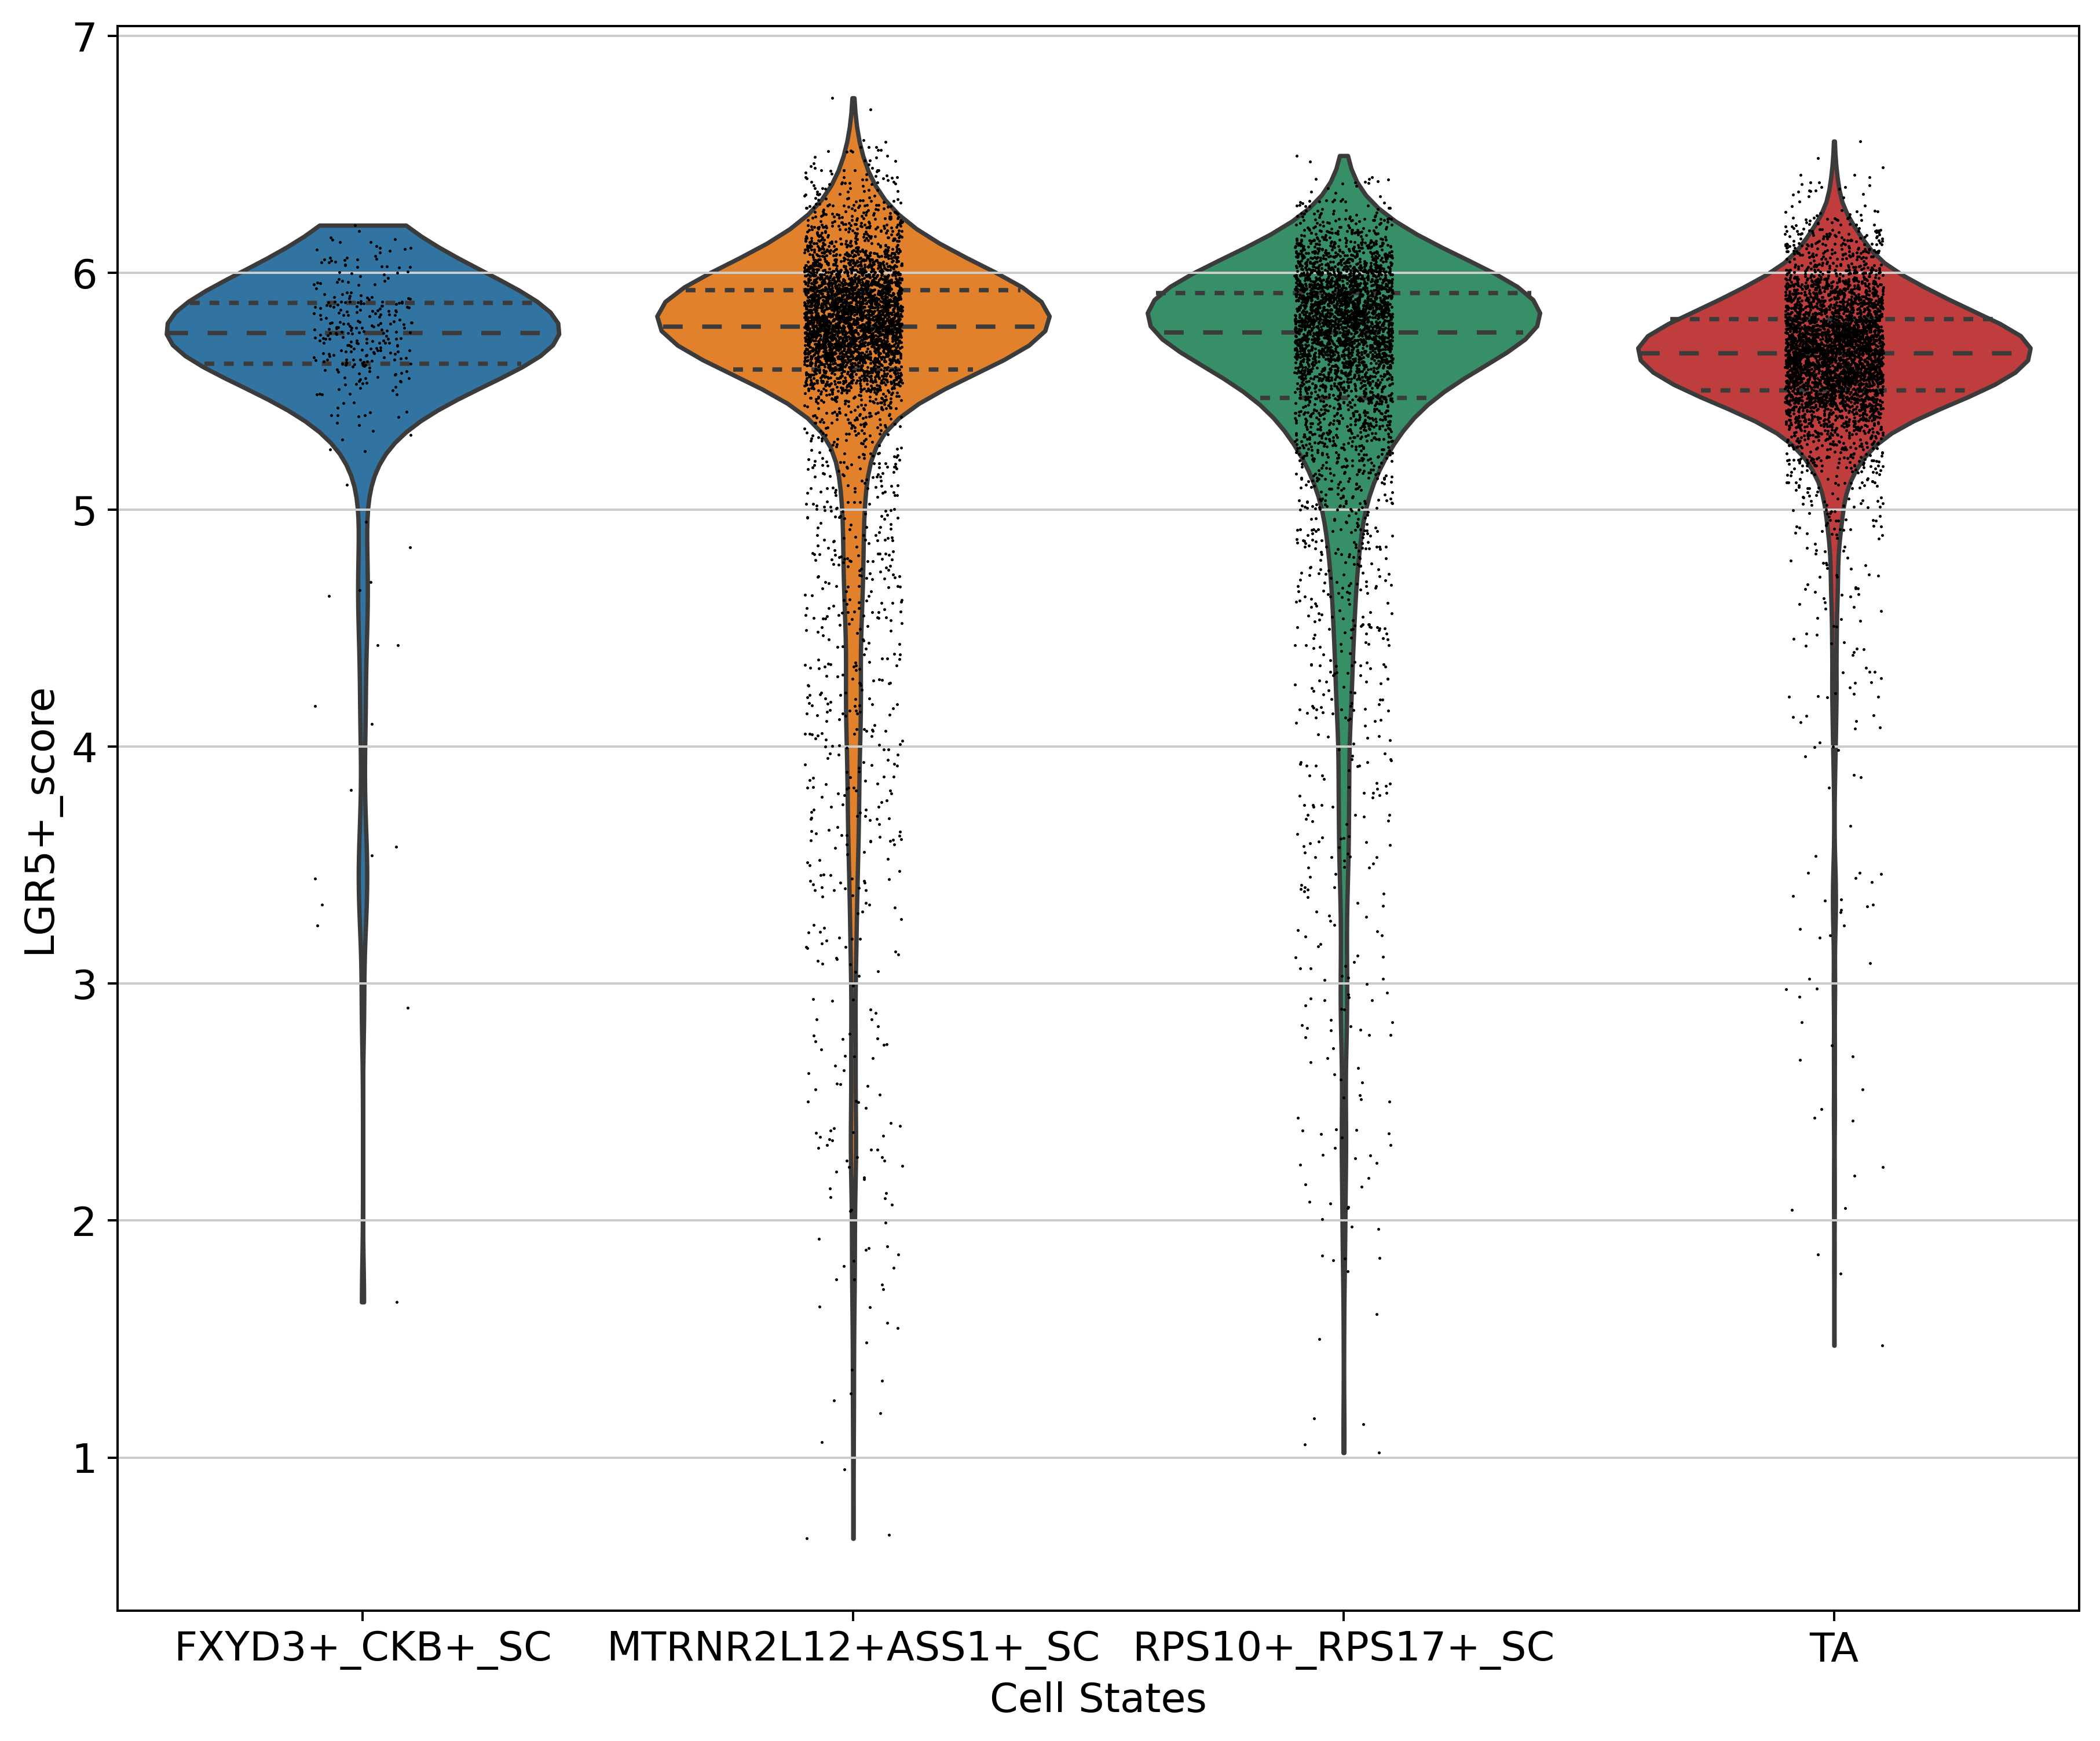

In [28]:
sc.set_figure_params(dpi=180, figsize=(10, 10))
sc.pl.violin(fetal_adata_log, keys='LGR5+_score', groupby='Cell States', stripplot=True, inner="quartile")

* Check if the developmental stage makes a difference

In [29]:
fetal_adata_log.obs['cell_type_age_group'] = fetal_adata_log.obs['Cell States'].astype(str) + '_' + fetal_adata_log.obs['Age_group'].astype(str)

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/amaguza/miniforge3/envs/scanpy_env/lib/python

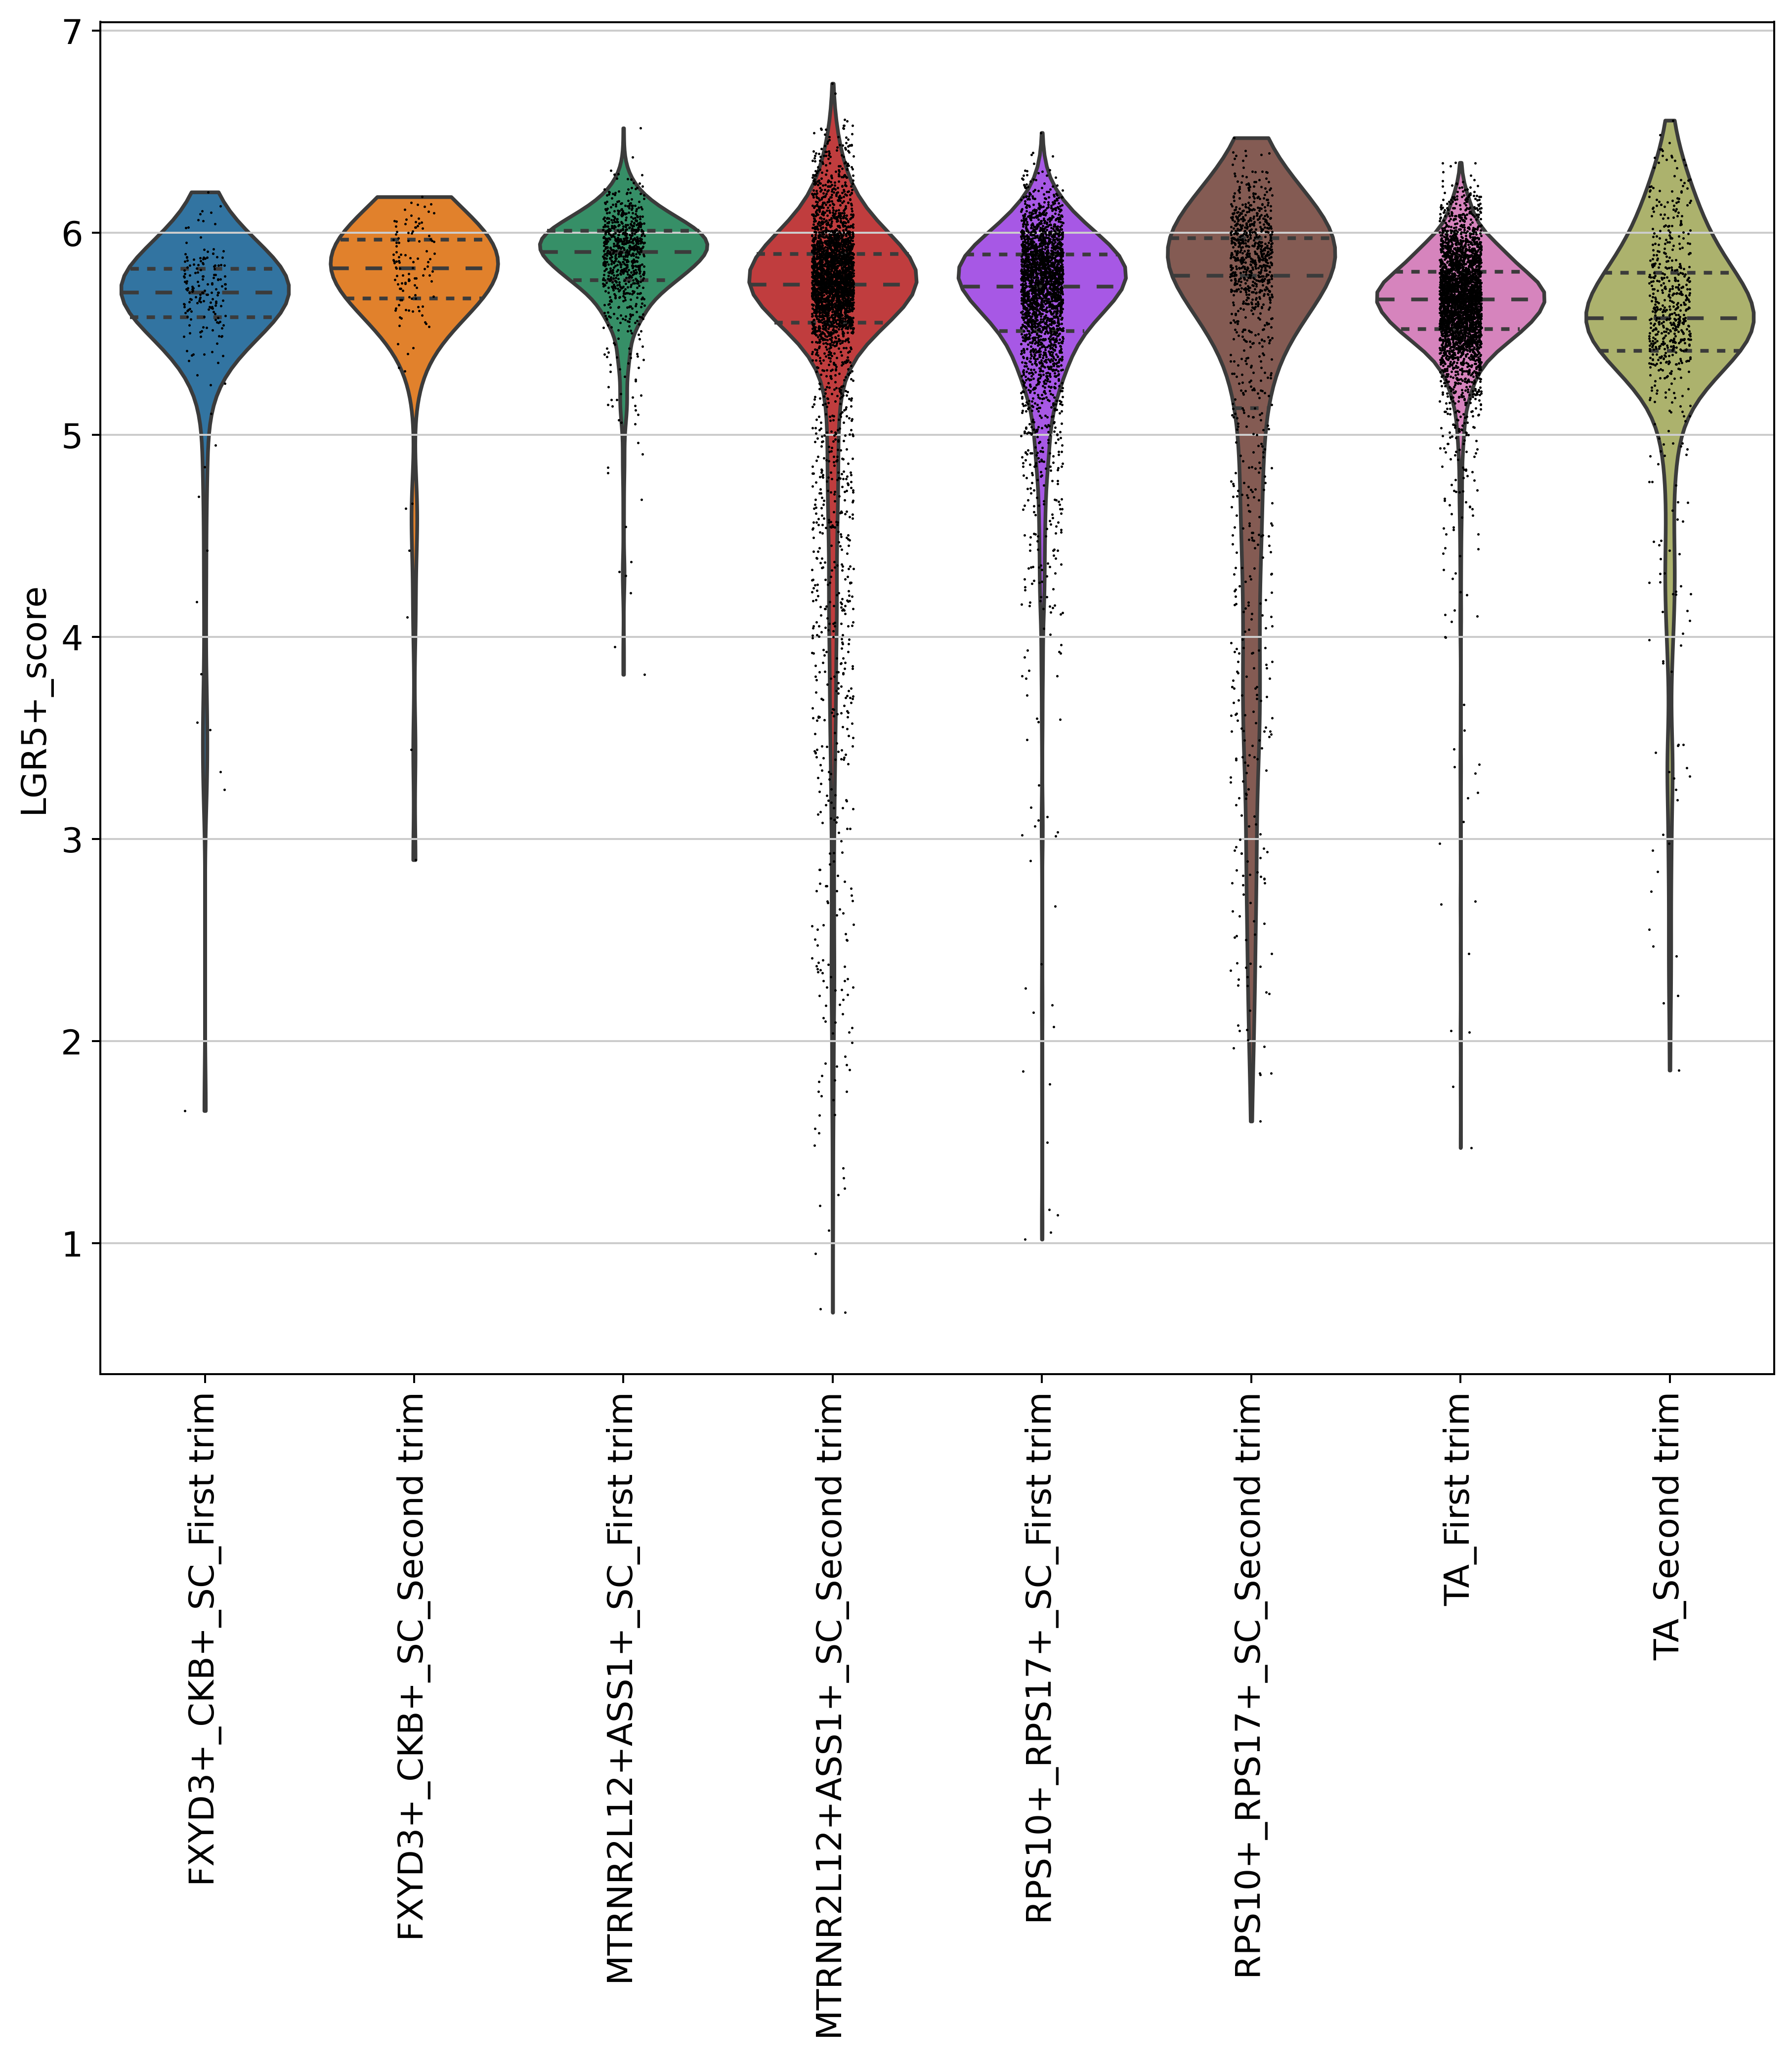

In [31]:
sc.set_figure_params(dpi=180, figsize=(10, 10))
sc.pl.violin(fetal_adata_log, keys='LGR5+_score', groupby='cell_type_age_group', stripplot=True, inner="quartile", rotation = 90)